<a href="https://colab.research.google.com/github/alekhya594/Sentiment_Analysis/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/subset_reviews.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,__label__2,Review,Unnamed: 2
0,0,0,__label__2,The best soundtrack ever to anything.: I'm rea...,NaN
1,1,1,__label__2,Amazing!: This soundtrack is my favorite music...,NaN
2,2,2,__label__2,Excellent Soundtrack: I truly like this soundt...,NaN
3,3,3,__label__2,"Remember, Pull Your Jaw Off The Floor After He...",NaN
4,4,4,__label__2,an absolute masterpiece: I am quite sure any o...,NaN


In [18]:
df = df.rename({'Unnamed: 0':'s_no'},axis=1)
df.head()

,s_no,Unnamed: 0.1,__label__2,Review,Unnamed: 2
0,0,0,__label__2,The best soundtrack ever to anything.: I'm rea...,NaN
1,1,1,__label__2,Amazing!: This soundtrack is my favorite music...,NaN
2,2,2,__label__2,Excellent Soundtrack: I truly like this soundt...,NaN
3,3,3,__label__2,"Remember, Pull Your Jaw Off The Floor After He...",NaN
4,4,4,__label__2,an absolute masterpiece: I am quite sure any o...,NaN


In [19]:
df = df.rename({'__label__2':'label'},axis=1)
df.head()

,s_no,Unnamed: 0.1,label,Review,Unnamed: 2
0,0,0,__label__2,The best soundtrack ever to anything.: I'm rea...,NaN
1,1,1,__label__2,Amazing!: This soundtrack is my favorite music...,NaN
2,2,2,__label__2,Excellent Soundtrack: I truly like this soundt...,NaN
3,3,3,__label__2,"Remember, Pull Your Jaw Off The Floor After He...",NaN
4,4,4,__label__2,an absolute masterpiece: I am quite sure any o...,NaN


In [20]:
df = df.drop(['Unnamed: 0.1'], axis=1)
df.head()

,s_no,label,Review,Unnamed: 2
0,0,__label__2,The best soundtrack ever to anything.: I'm rea...,NaN
1,1,__label__2,Amazing!: This soundtrack is my favorite music...,NaN
2,2,__label__2,Excellent Soundtrack: I truly like this soundt...,NaN
3,3,__label__2,"Remember, Pull Your Jaw Off The Floor After He...",NaN
4,4,__label__2,an absolute masterpiece: I am quite sure any o...,NaN


In [21]:
df = df.drop(['Unnamed: 2'], axis=1)
df.head()

,s_no,label,Review
0,0,__label__2,The best soundtrack ever to anything.: I'm rea...
1,1,__label__2,Amazing!: This soundtrack is my favorite music...
2,2,__label__2,Excellent Soundtrack: I truly like this soundt...
3,3,__label__2,"Remember, Pull Your Jaw Off The Floor After He..."
4,4,__label__2,an absolute masterpiece: I am quite sure any o...


In [22]:
df = df.drop(['s_no'], axis=1)
df.head()

,label,Review
0,__label__2,The best soundtrack ever to anything.: I'm rea...
1,__label__2,Amazing!: This soundtrack is my favorite music...
2,__label__2,Excellent Soundtrack: I truly like this soundt...
3,__label__2,"Remember, Pull Your Jaw Off The Floor After He..."
4,__label__2,an absolute masterpiece: I am quite sure any o...


In [23]:
df['label'].value_counts()

__label__1    1587
__label__2    1413
Name: label, dtype: int64

In [24]:
x = df['Review'].values
y = df['label'].values

In [25]:
y = [1 if x == '__label__1' else 0 for x in y]

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [35]:
print(X_train.shape)
print(X_test.shape)

(2250,)
(750,)


In [36]:
import numpy as np
np.unique(y_train,return_counts=True)

(array([0, 1]), array([1049, 1201]))

In [37]:
np.unique(y_test,return_counts=True)

(array([0, 1]), array([364, 386]))

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vect = CountVectorizer(ngram_range=(2,2))
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)
# df1 = pd.DataFrame(op,columns=vect.get_feature_names())
# df1

In [39]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import ComplementNB


In [40]:
vect = TfidfTransformer()
X_train = vect.fit_transform(X_train).toarray()

X_test = vect.transform(X_test).toarray()


In [51]:

# gnb =ComplementNB(alpha=1.0, fit_prior=True, class_prior=None)
# gnb.fit(X_train, y_train)
y_pred = gnb.predict([X_test[1]])
y_pred

array([0])

[[239 125]
 [ 18 368]]


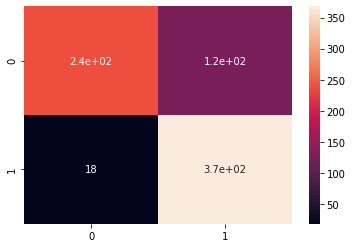

In [42]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)

In [43]:
data = classification_report(y_test, y_pred)
data

'              precision    recall  f1-score   support\n\n           0       0.93      0.66      0.77       364\n           1       0.75      0.95      0.84       386\n\n    accuracy                           0.81       750\n   macro avg       0.84      0.80      0.80       750\nweighted avg       0.84      0.81      0.80       750\n'

In [44]:
accuracy_score(y_test,y_pred)

0.8093333333333333

In [48]:
import joblib
joblib.dump(gnb,'sa')

['sa']